<a href="https://colab.research.google.com/github/priyansh2003/GAN-Architecture/blob/main/GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Dependencies to build our GAN!

In [1]:
!pip install tensorflow tensorflow-gpu matplotlib tensorflow-datasets ipywidgets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 588.3 MB 18 kB/s 
     |████████████████████████████████| 578.1 MB 8.0 kB/s 
     |████████████████████████████████| 578.1 MB 6.5 kB/s 
     |████████████████████████████████| 511.8 MB 28 kB/s 
     |████████████████████████████████| 1.6 MB 47.0 MB/s 


In [2]:
#Limiting memory growth in the GPU

import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu , TRUE)

In [3]:
import tensorflow_datasets as tfds
from matplotlib import pyplot as plt

In [4]:
ds = tfds.load('fashion_mnist', split = 'train')

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/fashion_mnist/3.0.1.incompleteUI03J3/fashion_mnist-train.tfrecord*...:   0%|  …

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/fashion_mnist/3.0.1.incompleteUI03J3/fashion_mnist-test.tfrecord*...:   0%|   …

Dataset fashion_mnist downloaded and prepared to ~/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [5]:
ds.as_numpy_iterator().next()['label']

2

Visualizing data!

In [6]:
import numpy as np

In [7]:
iterator = ds.as_numpy_iterator()

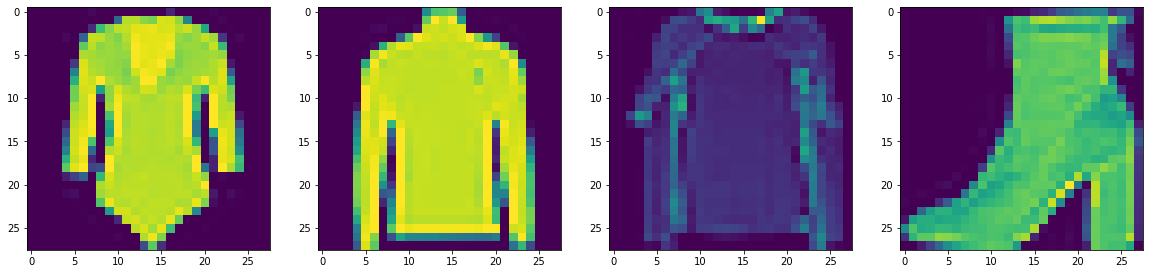

In [10]:
fig , ax = plt.subplots(ncols = 4 , figsize = (20,20))

for idx in range(4):
  #Grabbing our images and the respective labels
   sample = iterator.next()
   #Plotting images!
   ax[idx].imshow(np.squeeze(sample['image']))


In [11]:
#Scaling the images between 0 and 1.

def scale_images(data):
    image = data['image']
    return image/255

In [12]:
#Reloading our fashion dataset
ds = tfds.load('fashion_mnist', split = 'train')

#Running the datasetvia our scaling function to scale down the dtaa for faster processing
ds = ds.map(scale_images)

#Cache the dataset
ds= ds.cache()

#Shuffling the dataset
ds = ds.shuffle(60000)

#Batching the images in sizes of 128
ds= ds.batch(128)

#Preventing bottlenecking
ds = ds.prefetch(64)

In [16]:
ds.as_numpy_iterator().next().shape

(128, 28, 28, 1)